In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [3]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [4]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [5]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)


In [6]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [8]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 76s 92ms/step - loss: 0.6351 - accuracy: 0.5841 - val_loss: 0.3702 - val_accuracy: 0.8403
Epoch 2/50
782/782 [==============================] - 72s 92ms/step - loss: 0.3063 - accuracy: 0.8748 - val_loss: 0.3752 - val_accuracy: 0.8449
Epoch 3/50
782/782 [==============================] - 72s 91ms/step - loss: 0.2275 - accuracy: 0.9144 - val_loss: 0.3726 - val_accuracy: 0.8413
Epoch 4/50
782/782 [==============================] - 72s 92ms/step - loss: 0.1805 - accuracy: 0.9324 - val_loss: 0.4624 - val_accuracy: 0.8292
Epoch 5/50
782/782 [==============================] - 72s 91ms/step - loss: 0.1338 - accuracy: 0.9537 - val_loss: 0.4727 - val_accuracy: 0.8235
Epoch 6/50
782/782 [==============================] - 71s 91ms/step - loss: 0.1047 - accuracy: 0.9648 - val_loss: 0.5550 - val_accuracy: 0.8174
Epoch 7/50
782/782 [==============================] - 71s 91ms/step - loss: 0.0771 - accuracy: 0.9747 - val_loss: 0.6082 - val_accuracy:

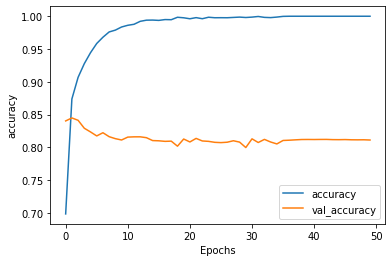

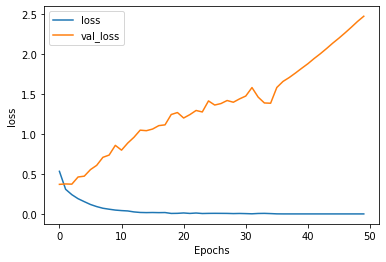

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [10]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [11]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 73s 89ms/step - loss: 0.5683 - accuracy: 0.6709 - val_loss: 0.3622 - val_accuracy: 0.8390
Epoch 2/50
782/782 [==============================] - 68s 87ms/step - loss: 0.2847 - accuracy: 0.8897 - val_loss: 0.3715 - val_accuracy: 0.8455
Epoch 3/50
782/782 [==============================] - 68s 87ms/step - loss: 0.2277 - accuracy: 0.9135 - val_loss: 0.4105 - val_accuracy: 0.8260
Epoch 4/50
782/782 [==============================] - 68s 87ms/step - loss: 0.1844 - accuracy: 0.9340 - val_loss: 0.4675 - val_accuracy: 0.8337
Epoch 5/50
782/782 [==============================] - 68s 87ms/step - loss: 0.1368 - accuracy: 0.9523 - val_loss: 0.4617 - val_accuracy: 0.8294
Epoch 6/50
782/782 [==============================] - 68s 87ms/step - loss: 0.0977 - accuracy: 0.9668 - val_loss: 0.5369 - val_accuracy: 0.8253
Epoch 7/50
782/782 [==============================] - 68s 87ms/step - loss: 0.0607 - accuracy: 0.9801 - val_loss: 0.6790 - val_accuracy:

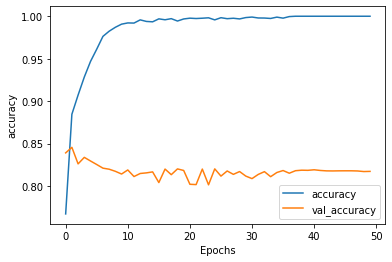

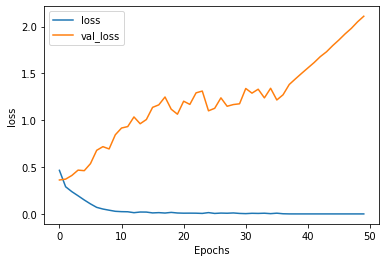

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [13]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 13s 16ms/step - loss: 0.5269 - accuracy: 0.7194 - val_loss: 0.3490 - val_accuracy: 0.8498
Epoch 2/50
782/782 [==============================] - 12s 15ms/step - loss: 0.2661 - accuracy: 0.8942 - val_loss: 0.3522 - val_accuracy: 0.8478
Epoch 3/50
782/782 [==============================] - 12s 16ms/step - loss: 0.2113 - accuracy: 0.9223 - val_loss: 0.3964 - val_accuracy: 0.8315
Epoch 4/50
782/782 [==============================] - 12s 16ms/step - loss: 0.1692 - accuracy: 0.9383 - val_loss: 0.4133 - val_accuracy: 0.8297
Epoch 5/50
782/782 [==============================] - 12s 16ms/step - loss: 0.1305 - accuracy: 0.9579 - val_loss: 0.4900 - val_accuracy: 0.8245
Epoch 6/50
782/782 [==============================] - 12s 16ms/step - loss: 0.0969 - accuracy: 0.9708 - val_loss: 0.5370 - val_accuracy: 0.8166
Epoch 7/50
782/782 [==============================] - 13s 16ms/step - loss: 0.0794 - accuracy: 0.9780 - val_loss: 0.6546 - val_accuracy:

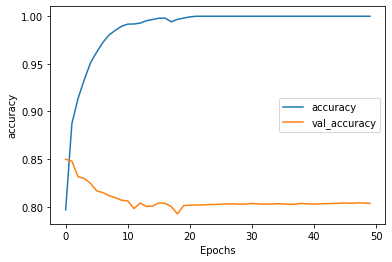

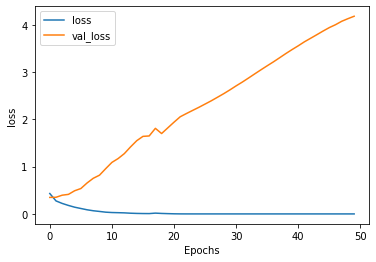

In [15]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')